<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [253]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [254]:
df = pd.read_csv('property.csv')


# Data Fixing

In [255]:
#Shrinking the pnd column to have smallest amount of unique values
df['PrimaryNeighborhoodDescription'].unique()
pndlist = []
for i in df['PrimaryNeighborhoodDescription']:
  if i == 'south end':
    pndlist.append('SO.END')
  elif i == 'southern end':
    pndlist.append('south end')
  elif i == 'NEW NO END':
    pndlist.append('new north end')
  elif i == 'SO HILL SECT':
    pndlist.append('southern hill')
  elif i == 'DOWNTOWN':
    pndlist.append('downtown')
  elif i == 'UNIV HILL':
    pndlist.append('UVM hill area')
  elif i == 'OLD NO END':
    pndlist.append('old north end')
  else:
    pndlist.append(i)

df['PrimaryNeighborhoodDescription'] = pndlist
df['PrimaryNeighborhoodDescription'].unique()

array(['new north end', 'INTERVALE', 'old north end', 'NRTH AVE EXT',
       'NNE MIDRANGE', 'NNE WATERVIEW', 'NNE Small Complex',
       'NNE BASE COMPLEX', 'waterfront', 'Starr Farm Beach', '0',
       'WATERFRONT', 'lakeview tr', 'DWT SMALL COMPLEX', 'northern hill',
       'RIVERSIDE AV', 'NORTH ST', 'DWT WATERVIEW', 'DWT MIDRANGE',
       'DWT BASE COMPLEX', 'CBD', 'DOWNTN APTS', 'HILL APTS',
       'CHURCH ST MK', 'downtown', 'southern hill', 'UVM hill area',
       'UVM CAMPUS', 'SO.END', 'south end', 'DWT MID LEVEL',
       'SE SAMLL COMPLEX', 'SE MIDRANGE', 'INDUSTRIAL P', 'SHELBURNE ST',
       'DWT HIGH END', 'SE WATERFRONT', 'SE BASE COMPLEX', 'SE HIGN END',
       'DWT MED/HIGH END', 'RCO ZONE', 'EAST AVENUE'], dtype=object)

In [256]:
#Fixing LastSaleDate and StoryHeight Columns
#df.dtypes
df['YearBuilt'] = df['YearBuilt'].fillna(0).astype(int)
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])
df.dtypes
#df['StoryHeight'].unique()
story = []

for i in df['StoryHeight']:

  if i == 'Two Sty':
    story.append('2')
    
  elif i== 'One Sty':
    story.append('1')
    
  elif i == 'Three Sty':
    story.append('3')
    
  elif i == 'Four Sty':
    story.append('4')
    
  elif i == 'Five Sty':
    story.append('5')
    
  elif i == 'Six Sty':
    story.append('6')
    
  elif i == '9 Story':
    story.append('9')
  
  elif i == '4 story':
    story.append('4')
    
  elif i == '4 Story':
    story.append('4')
   
  elif i == '7 Story':
    story.append('7')
    
  elif i == '6 Story':
    story.append('6')
    
  elif i == '5 Stories':
    story.append('5')
   
  elif i == '8 Story':
    story.append('8')
    
  else:
      story.append(i)
df['StoryHeight'] = story
df['StoryHeight'] = df['StoryHeight'].astype(float)
df['StoryHeight']
#story

0        1.50
1         NaN
2        1.50
3        2.00
4        1.75
         ... 
11403    1.00
11404    1.00
11405    1.00
11406    4.00
11407    1.00
Name: StoryHeight, Length: 11408, dtype: float64

In [257]:
#fixing number columns to remove unneccessary characters
df['BuildingValue'] = df['BuildingValue'].astype(str)
df['BuildingValue'] = df['BuildingValue'].str.replace(',','')
df['BuildingValue'] = df['BuildingValue'].str.replace('$','')
df['BuildingValue'] = df['BuildingValue'].astype(float)
######
df['LandValue'] = df['LandValue'].astype(str)
df['LandValue'] = df['LandValue'].str.replace(',','')
df['LandValue'] = df['LandValue'].str.replace('$','')
df['LandValue'] = df['LandValue'].astype(float)
######

########
df['LastSaleAmount'] = df['LastSaleAmount'].astype(str)
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace(',','')
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace('$','')
df['LastSaleAmount'] = df['LastSaleAmount'].astype(float)
########
#square feet removal
########
df['LotSqFeet'] = df['LotSqFeet'].astype(str)
df['LotSqFeet'] = df['LotSqFeet'].str.replace(' sqft','')
df['LotSqFeet'] = df['LotSqFeet'].str.replace(',','')
df['LotSqFeet'] = df['LotSqFeet'].astype(int)
#########
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(str)
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(' sqft','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(',','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(int)
#########
#########
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(str)
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(' sqft','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(',','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [258]:
#Adding numeric scale to physical condition
#print(df['PhysicalCondition'].unique())
nums = []
for i in df['PhysicalCondition']:
  if i == 'Fair':
    nums.append(1)
  elif i == 'Fair-Avg':
    nums.append(2)
  elif i == 'Average':
    nums.append(3)
  elif i == 'Avg-Good':
    nums.append(4)
  elif i == 'Good':
    nums.append(5)
  elif i == 'Good-VG':
    nums.append(6)
  else:
    nums.append(7)
df['PhysicalCondition'] = nums
df['PhysicalCondition'] = df['PhysicalCondition'].astype(int)
df['PhysicalCondition'].sample(20)

7745     3
1245     2
7312     3
243      5
10740    7
9325     3
6940     3
10341    7
4070     1
11397    5
9677     3
184      3
10229    3
2161     5
2457     1
6406     1
666      3
3690     5
11235    7
1087     3
Name: PhysicalCondition, dtype: int64

In [259]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative

['PropertyId',
 'LastSaleDate',
 'LastSaleAmount',
 'LotSqFeet',
 'BuildingValue',
 'LandValue',
 'BuildingNo',
 'YearBuilt',
 'StoryHeight',
 'BuildingGrossAreaSF',
 'BuildingFinishedSf',
 'TotalRooms',
 'Bedrooms',
 'FullBaths',
 'HalfBaths',
 'ResidentialUnits',
 'CommercialUnits',
 'PhysicalCondition',
 'DepreciationPct']

In [260]:
#dropping columns 
#df = df.drop(columns=['TaxParcelId', 'VermontSPAN', 'StreetAddressFormatted', 'PrimaryLandUseCode', 'FoundationType', 'Quality'])


# Model Building

In [261]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only = df_numerics_only.drop(columns=['BuildingValue'])

In [262]:
#df_numerics_only.isnull().sum(axis = 0)

In [263]:
#

df_numerics_only['StoryHeight'] = df_numerics_only['StoryHeight'].fillna(1)
df_numerics_only['ResidentialUnits'] =df_numerics_only['ResidentialUnits'].fillna(1)
df_numerics_only['CommercialUnits'] =df_numerics_only['CommercialUnits'].fillna(1)
#df_numerics_only['ResidentialUnits']

In [264]:
#df_numerics_only.mean()

In [265]:
#filling nans with the average
df_numerics_only['LastSaleAmount'] = df_numerics_only['LastSaleAmount'].fillna(454221)

In [266]:
scaled_features  = StandardScaler().fit_transform(df_numerics_only.values)
df_numerics_only = pd.DataFrame(scaled_features, index=df_numerics_only.index, columns=df_numerics_only.columns)

In [267]:
#building model inputs
Y = df['BuildingValue']
Y = Y.values.reshape(-1, 1)
Y = StandardScaler().fit_transform(Y)
X = df_numerics_only
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y

array([[-0.00496577],
       [-0.07251107],
       [-0.06386065],
       ...,
       [-0.06969708],
       [-0.04710934],
       [-0.05032127]])

In [268]:
#df_numerics_only['LastSaleAmount']

In [269]:
df['BuildingValue'].describe()

count    1.140800e+04
mean     1.530622e+06
std      2.110972e+07
min      0.000000e+00
25%      1.988000e+05
50%      2.688000e+05
75%      3.882250e+05
max      5.767676e+08
Name: BuildingValue, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


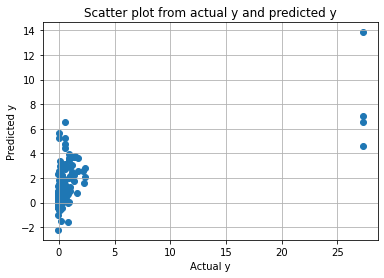

Mean Absolute percentage Error : 35.29538221862569
Mean Absolute Error : 0.12904684614877446
r2 score is : 0.3665082991981904
y is: [[ 0.12552484]
 [-0.04502964]
 [-0.06314531]
 ...
 [-0.06107508]
 [-0.06573191]
 [-0.03137656]]
predicted was: [ 0.19108761 -0.14724905 -0.13089265 ... -0.12089087 -0.07416159
  0.01034254]
score is: 0.3665082991981904


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [270]:
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train, Y_train)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', clf_.score(X_test, Y_test))

model performance is low going to look at the correlation matrix now

#Data Exploration

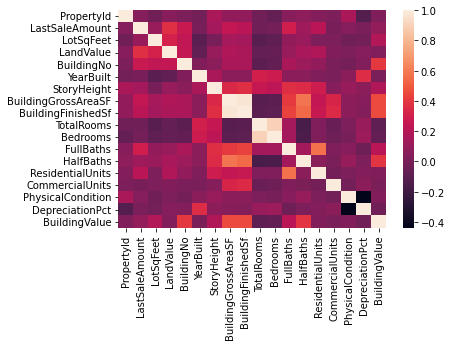

In [271]:
#correlation matrix
corrdata = df_numerics_only
corrdata['BuildingValue'] = Y

corr = corrdata.corr()
sns.heatmap(corr)

The correlation matrix is kind of difficult to read without feature reduction because a lot of the features have little to no correlation to the target variable building value. A lot of variables are highly correlated to eachother but not with the target variable. It is no wonder the model performed so poorly

In [272]:
pca = PCA(n_components=None)
pca.fit(corrdata)
pca.components_ 


array([[ 7.76913090e-02,  2.21169536e-01,  1.43018455e-01,
         1.87300629e-01,  1.99694687e-01,  4.18120299e-02,
         2.70483803e-01,  4.52751226e-01,  4.51761180e-01,
        -4.43118147e-02, -4.00940367e-02,  3.08968046e-01,
         3.28959888e-01,  2.25815139e-01,  1.28824599e-01,
         6.15841552e-02,  1.91506255e-02,  2.94377676e-01],
       [-2.87190018e-02,  1.06352514e-02, -1.43231907e-01,
        -7.42572542e-02, -8.29419431e-02,  3.46997422e-01,
         2.71244454e-01, -3.14241373e-02, -2.47947311e-02,
         5.76689887e-01,  5.66970382e-01,  1.98120963e-01,
        -9.09024038e-02,  1.38205288e-01, -3.22050648e-02,
        -2.39580147e-02,  2.03960183e-01, -8.19560368e-02],
       [-3.10684350e-01, -8.91246213e-02,  8.56570527e-02,
        -6.45412573e-03,  1.01647751e-01,  2.19782565e-01,
        -1.37061297e-01,  9.82601214e-02,  8.66203889e-02,
        -8.07096975e-02, -5.41643726e-02, -1.91495053e-01,
         5.89066018e-02, -1.73694593e-01,  1.79006176e

In [273]:
#cor_target = abs(corr["BuildingValue"])
#Selecting the 5 dimensions to build the optimal model
#relevant_features = cor_target[cor_target>0.33]
#relevant_features
#buildingno, grossarea, finishedsf, half baths



features chosen for the best correleation to the target variable
I'm assuming that buildingNo correlates with some kind of location which would give us a correlation to price. 

# Model with selected features

In [274]:
X = df_numerics_only
X = X.drop(columns=['BuildingValue'])

Eigenvalues:
[3.51065323 2.37648775 1.57805217 1.55811083 1.18272287 1.0585263
 0.95042223 0.8896913  0.80215358 0.74634944 0.61727806 0.53325739
 0.3889215  0.36075589 0.32858666 0.0946196  0.02490154]

Variances (Percentage):
[20.64909116 13.97811431  9.28184611  9.1645544   6.95658351  6.22607946
  5.59022892  5.23301946  4.71813684  4.38990597  3.63072911  3.1365332
  2.28757298  2.12190745  1.93269327  0.55653708  0.14646678]



Text(0, 0.5, 'Explained variance (%)')

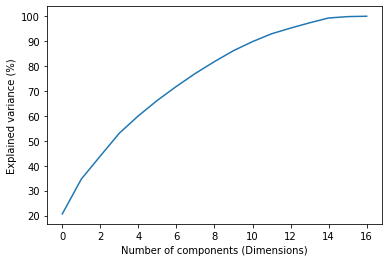

In [275]:
pca.fit(X)
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Looks like ten components gives us 90% of the explained variance so I'm going to keep ten components.

In [276]:
#Building input and scaling the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#X_test=np.array(X_test)
#Y_test=np.array(Y_test)
#X_train=np.array(X_train)
#Y_train = np.array(Y_train)

In [277]:
pca = PCA(n_components=10)
X = df_numerics_only
X = X.drop(columns=['BuildingValue'])
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2          3          4         5         6  \
0  4.742241 -5.001311  9.442249 -11.913746 -12.720506  8.832430 -9.378217   
1 -0.671370 -5.254488 -0.054950  -2.508196  -0.031117  3.772604 -3.166724   
2 -0.715086 -0.611406  1.194813   0.122892   0.661048  0.201549 -0.855089   
3 -0.354814 -0.056905  1.020845   0.139328   0.679036  0.211379 -0.958714   
4 -0.560386 -0.176039  0.804959   0.083079   0.552480  0.324170 -0.984699   

           7          8          9  
0  10.388480 -16.441465  11.565405  
1   2.707558  -1.270735   0.184476  
2  -0.798545   0.314075   0.275355  
3  -0.560150   0.311236   0.174934  
4  -0.799223   0.264927   0.159757  

Size: 
(11408, 10)


In [278]:
Y.shape

(11408, 1)

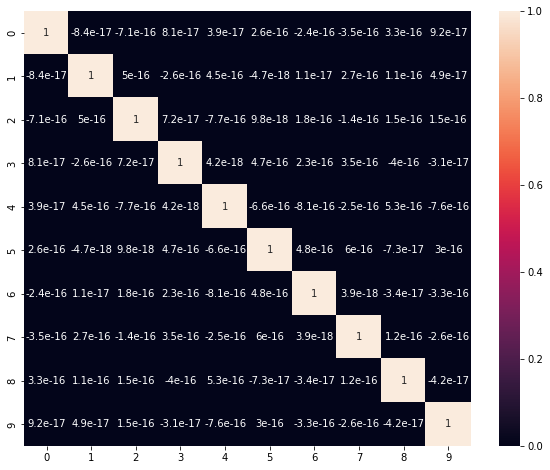

In [279]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

None of the features are correlated with eachother and now has been brought back to the original dataset as all uncorrelated features. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


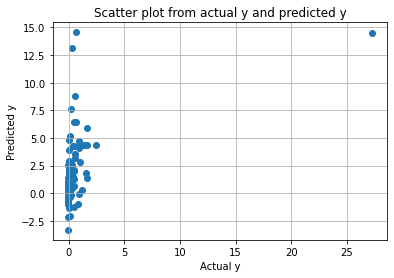

Mean Absolute percentage Error : 41.84339998166356
Mean Absolute Error : 0.2215658258089213
r2 score is : -0.427683341898381
y is: [[-0.07251107]
 [-0.07251107]
 [-0.0642728 ]
 ...
 [-0.03289252]
 [-0.06209835]
 [-0.06144459]]
predicted was: [-0.38293332 -0.39543495 -0.19059154 ... -0.09561753 -0.20739301
 -0.35826528]
score is: -0.427683341898381


In [280]:
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.20, 
                                                            shuffle=True, random_state=2)
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train_pca, Y_train)

y_pred_sksgd=clf_.predict(X_test_pca)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', clf_.score(X_test_pca, Y_test))

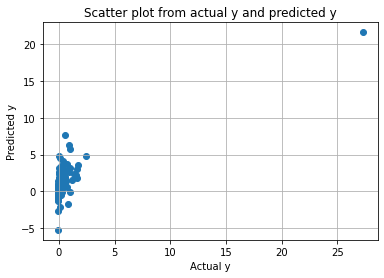

Mean Absolute percentage Error : 39.18909992914038
Mean Absolute Error : 0.16333247871226758
r2 score is : 0.41693103310650803
y is: [[-0.07251107]
 [-0.07251107]
 [-0.0642728 ]
 ...
 [-0.03289252]
 [-0.06209835]
 [-0.06144459]]
predicted was: [[-0.12020197]
 [ 0.01520415]
 [-0.11845762]
 ...
 [-0.01878067]
 [-0.10563597]
 [-0.15285046]]
score is: 0.41693103310650803


In [281]:
#Kernel Ridge Regression 
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train_pca,Y_train)
y_pred_sksgd=krr.predict(X_test_pca)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', krr.score(X_test_pca, Y_test))

After dimensional reduction we see a greater model performance with SDG regressor. By reducing the dimensions we are eliminating potential correlations from different features that might mess with model performance. By selecting the highest correlated features it allows the model to predict with higher accuracy. 